# Forward Propagation with multiple Samples at once

Until now we just did forward propagation with one example (represented by a feature vector x). In forward propagation we had 
* matrix-vector multiplications in the linear combination layer (Dense layer) 
* elementwise sigmoid in the activation layer (Sigmoid Layer)

We now want to see if we can get a whole batch of training examples through the network in one pass. The data is stored in out sample maxtrix $X$ with dimensions $(samples$ $x$ $features)$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time as time
print("All imported")


All imported


## This is what we want to implement 
This time instead of feeding a a vector $x$ we waht to feed a whole matrix of samples $X$ with X.shape = (Samples, features) 

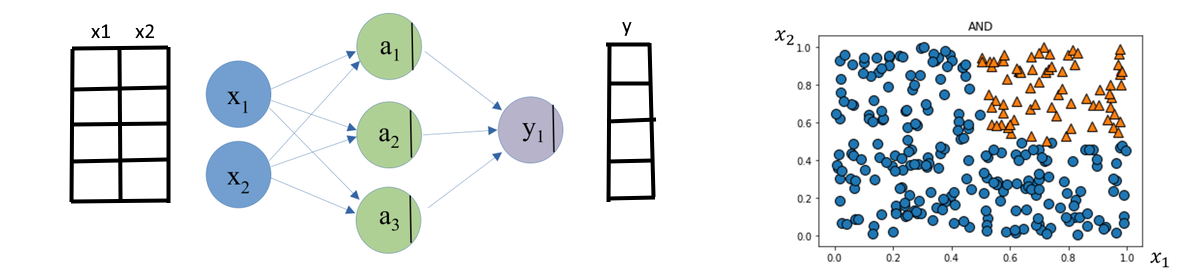

## Classes that may stay the same

In [2]:
class Layer:
    """
    An identity Layer to be the base of inheritance
    """
    def __init__(self):
        pass
    
    def forward(self, input):
        # identity, same output as input
        return input

In [3]:
class Sigmoid(Layer):
    def __init__(self):
        pass
    
    def forward(self, input):
        """Apply elementwise sigmoid to [batch, input_units] matrix"""
        return 1/(1 + np.exp(-input))
    
    def __str__(self):
        return "Sigmoid layer"

## Adapting the code of the Layers

For the single training example code we dot-multiplied the feature vector from the right to the matrix . When we feed a sample matrix with dimension $(samples$ $x$ $features)$ we have to rethink the forward function.

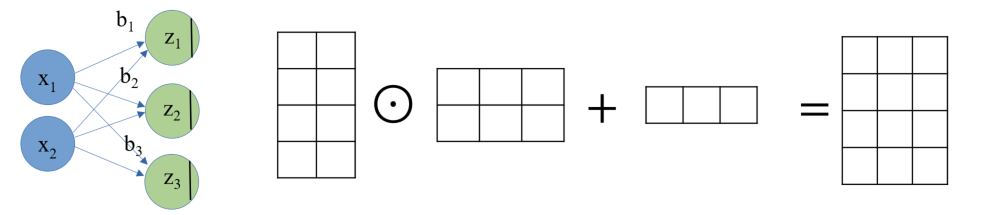

In [4]:
class Dense(Layer):
    def __init__(self, input_units, output_units, weights=None, biases=None):
        # initialize weights with small random numbers. We use normal initialization,
        if weights is None:
            self.weights = np.random.randn(input_units, output_units)*0.01
        else: 
            self.weights = weights
        if biases is None:
            self.biases = np.zeros(output_units)
        else:
            self.biases = biases
        
    def forward(self,input):
        return np.dot(input, self.weights)+self.biases
    
    def __str__(self):
        return f"Dense layer ({self.weights.shape})"
    

![](attachment:grafik2.png)
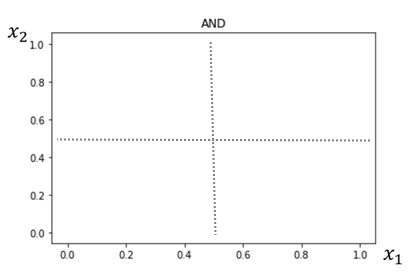
## Testing layer with example data 

In [5]:
# creating the data 4 examples
x1 = np.array([0.6,0.4]) # negative class
x2 = np.array([0.8,0.1]) # negative class
x3 = np.array([0.1,0.8]) # negative class
x4 = np.array([0.8,0.8]) # positive class
X = np.array([x1,x2,x3,x4]) 
y = np.array([0,0,0,1]) 
X,y

(array([[0.6, 0.4],
        [0.8, 0.1],
        [0.1, 0.8],
        [0.8, 0.8]]),
 array([0, 0, 0, 1]))

In [6]:
# creating the first layer and feed data
layer = Dense(2,3)
Sigmoid().forward(layer.forward(X))


array([[0.50249846, 0.49811204, 0.5008606 ],
       [0.50301219, 0.49951714, 0.49882277],
       [0.50095641, 0.49624253, 0.50407746],
       [0.50352761, 0.49623083, 0.50257803]])

## Adapting the code for the Network

Some smaller adaptions are necessary. 
* First we switched the dimensions of the weight matrix, so this was to be transposed in the init-Function. 
* In addition the function for the loss now also needs to take care about different dimensions.
* In order to debug later we should add a verbose mode 

In [11]:
class Network:
    def __init__(self): 
        self.layers = []
        self.layers.append(Dense(2,3, np.array([[1000,0],[0,1000],[0,0]]).T, np.array([-500,-500,0])))
        self.layers.append(Sigmoid())
        self.layers.append(Dense(3,1, np.array([[10, 10, 0]]).T, np.array([-18])))
        self.layers.append(Sigmoid())
        
    def predict(self, input, verbose=False):
        for layer in self.layers:
            input = layer.forward(input)
            if verbose: 
                print(f"Output of {layer} is {input.shape}")
        return input
    
    def __str__(self):
        text = "Network:\n"
        for layer in self.layers:
            text +=  f"{layer.__str__()}\n"
        return text
    
    def loss(self, y, pred):
        assert pred.shape == y.shape 
        vec = -np.log(pred)*y-(np.log(1-pred)*(1-y))
        return np.mean(vec);
    
print(Network())

Network:
Dense layer ((2, 3))
Sigmoid layer
Dense layer ((3, 1))
Sigmoid layer



What did we change
* Init-Function: Transpose weights
* Lossfunction: Adapt Assertion
* Add a verbose mode for observing the results

## Vizualize in a plot, now without a for loop

Create a larger batch of unlabeld test examples. Pass it through the network as a whole batch. Then the predictions of the model should be plotted in a scatter plot. 

Finally add a time measurement with the function "time.time() and print the time used.".

In [8]:
net = Network()
X = np.random.rand(500,2) 
startTime = time.time()
print(X.shape)
p = net.predict(X)
endTime = time.time()
print("Used Time: ", endTime-startTime)

colors  = np.array(["blue", "green"])[(p<0.5)*1].reshape(500,)

(500, 2)
Input of Dense layer ((2, 3)) is (500, 2)
Input of Sigmoid layer is (500, 3)
Input of Dense layer ((3, 1)) is (500, 3)
Input of Sigmoid layer is (500, 1)
Used Time:  0.0


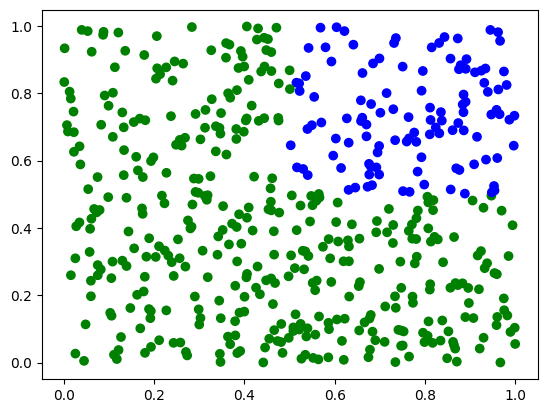

In [9]:
# create the scatter plot

plt.scatter(X[:,0],X[:,1],c=colors, marker="o")
plt.show()

# Make network class more generic 
Solution for Exercise 2: Store all created Layers in a list and change predict function to work with arbitrary layers.

![](attachment:grafik2.png)
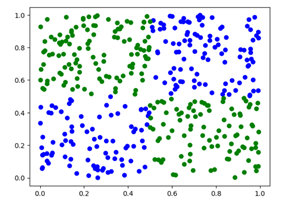
# Exercises

## Exercise 1 - NOT XOR

Create a network that implements a xor logic, find network structure, weights and implement/debug the network. First start on Paper before you actually try to implement it.

In [10]:
class Network:
    def __init__(self): 
        # create Network structure and weights
        _?_
        

    def predict(self, input, verbose=False):
        #add prediction code
        _?_
        return y
    
    def __str__(self):
        text = "Network:\n"
        # show weights
        return text
    
    def loss(self, y, pred):
        assert pred.shape == y.shape
        vec = -np.log(pred)*y-(np.log(1-pred)*(1-y))
        return np.mean(vec);
    
print(Network())

SyntaxError: invalid syntax (230127493.py, line 4)

You can debug with the following code. There is two types of input data, a larger set and a set of just one coordinate.

## Exercise 2

Store all created Layers in a list and change predict function to work with arbitrary layers.

In [ ]:
# see above, classes Dense and Network were changed

## Exercise 3
Can we also create any other logical operatores (Not, Or) ?